In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [46]:
df = pd.read_csv("abalone.csv", index_col = 0)
df = df.reset_index()
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [47]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [48]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked',
       'Viscera', 'Shell', 'Rings']

In [49]:
#df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

In [50]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

df['Sex']=label.fit_transform(df['Sex'])

In [51]:
df

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [52]:
y=df['Rings']
X=df.drop('Rings',axis=1)

In [53]:
X

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [54]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [56]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()

model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error



ly_preds = model.predict(X_test)

mse = np.sqrt(mean_squared_error(ly_preds, y_test))

print('평균제곱근오차', mse)

평균제곱근오차 2.177169893009526


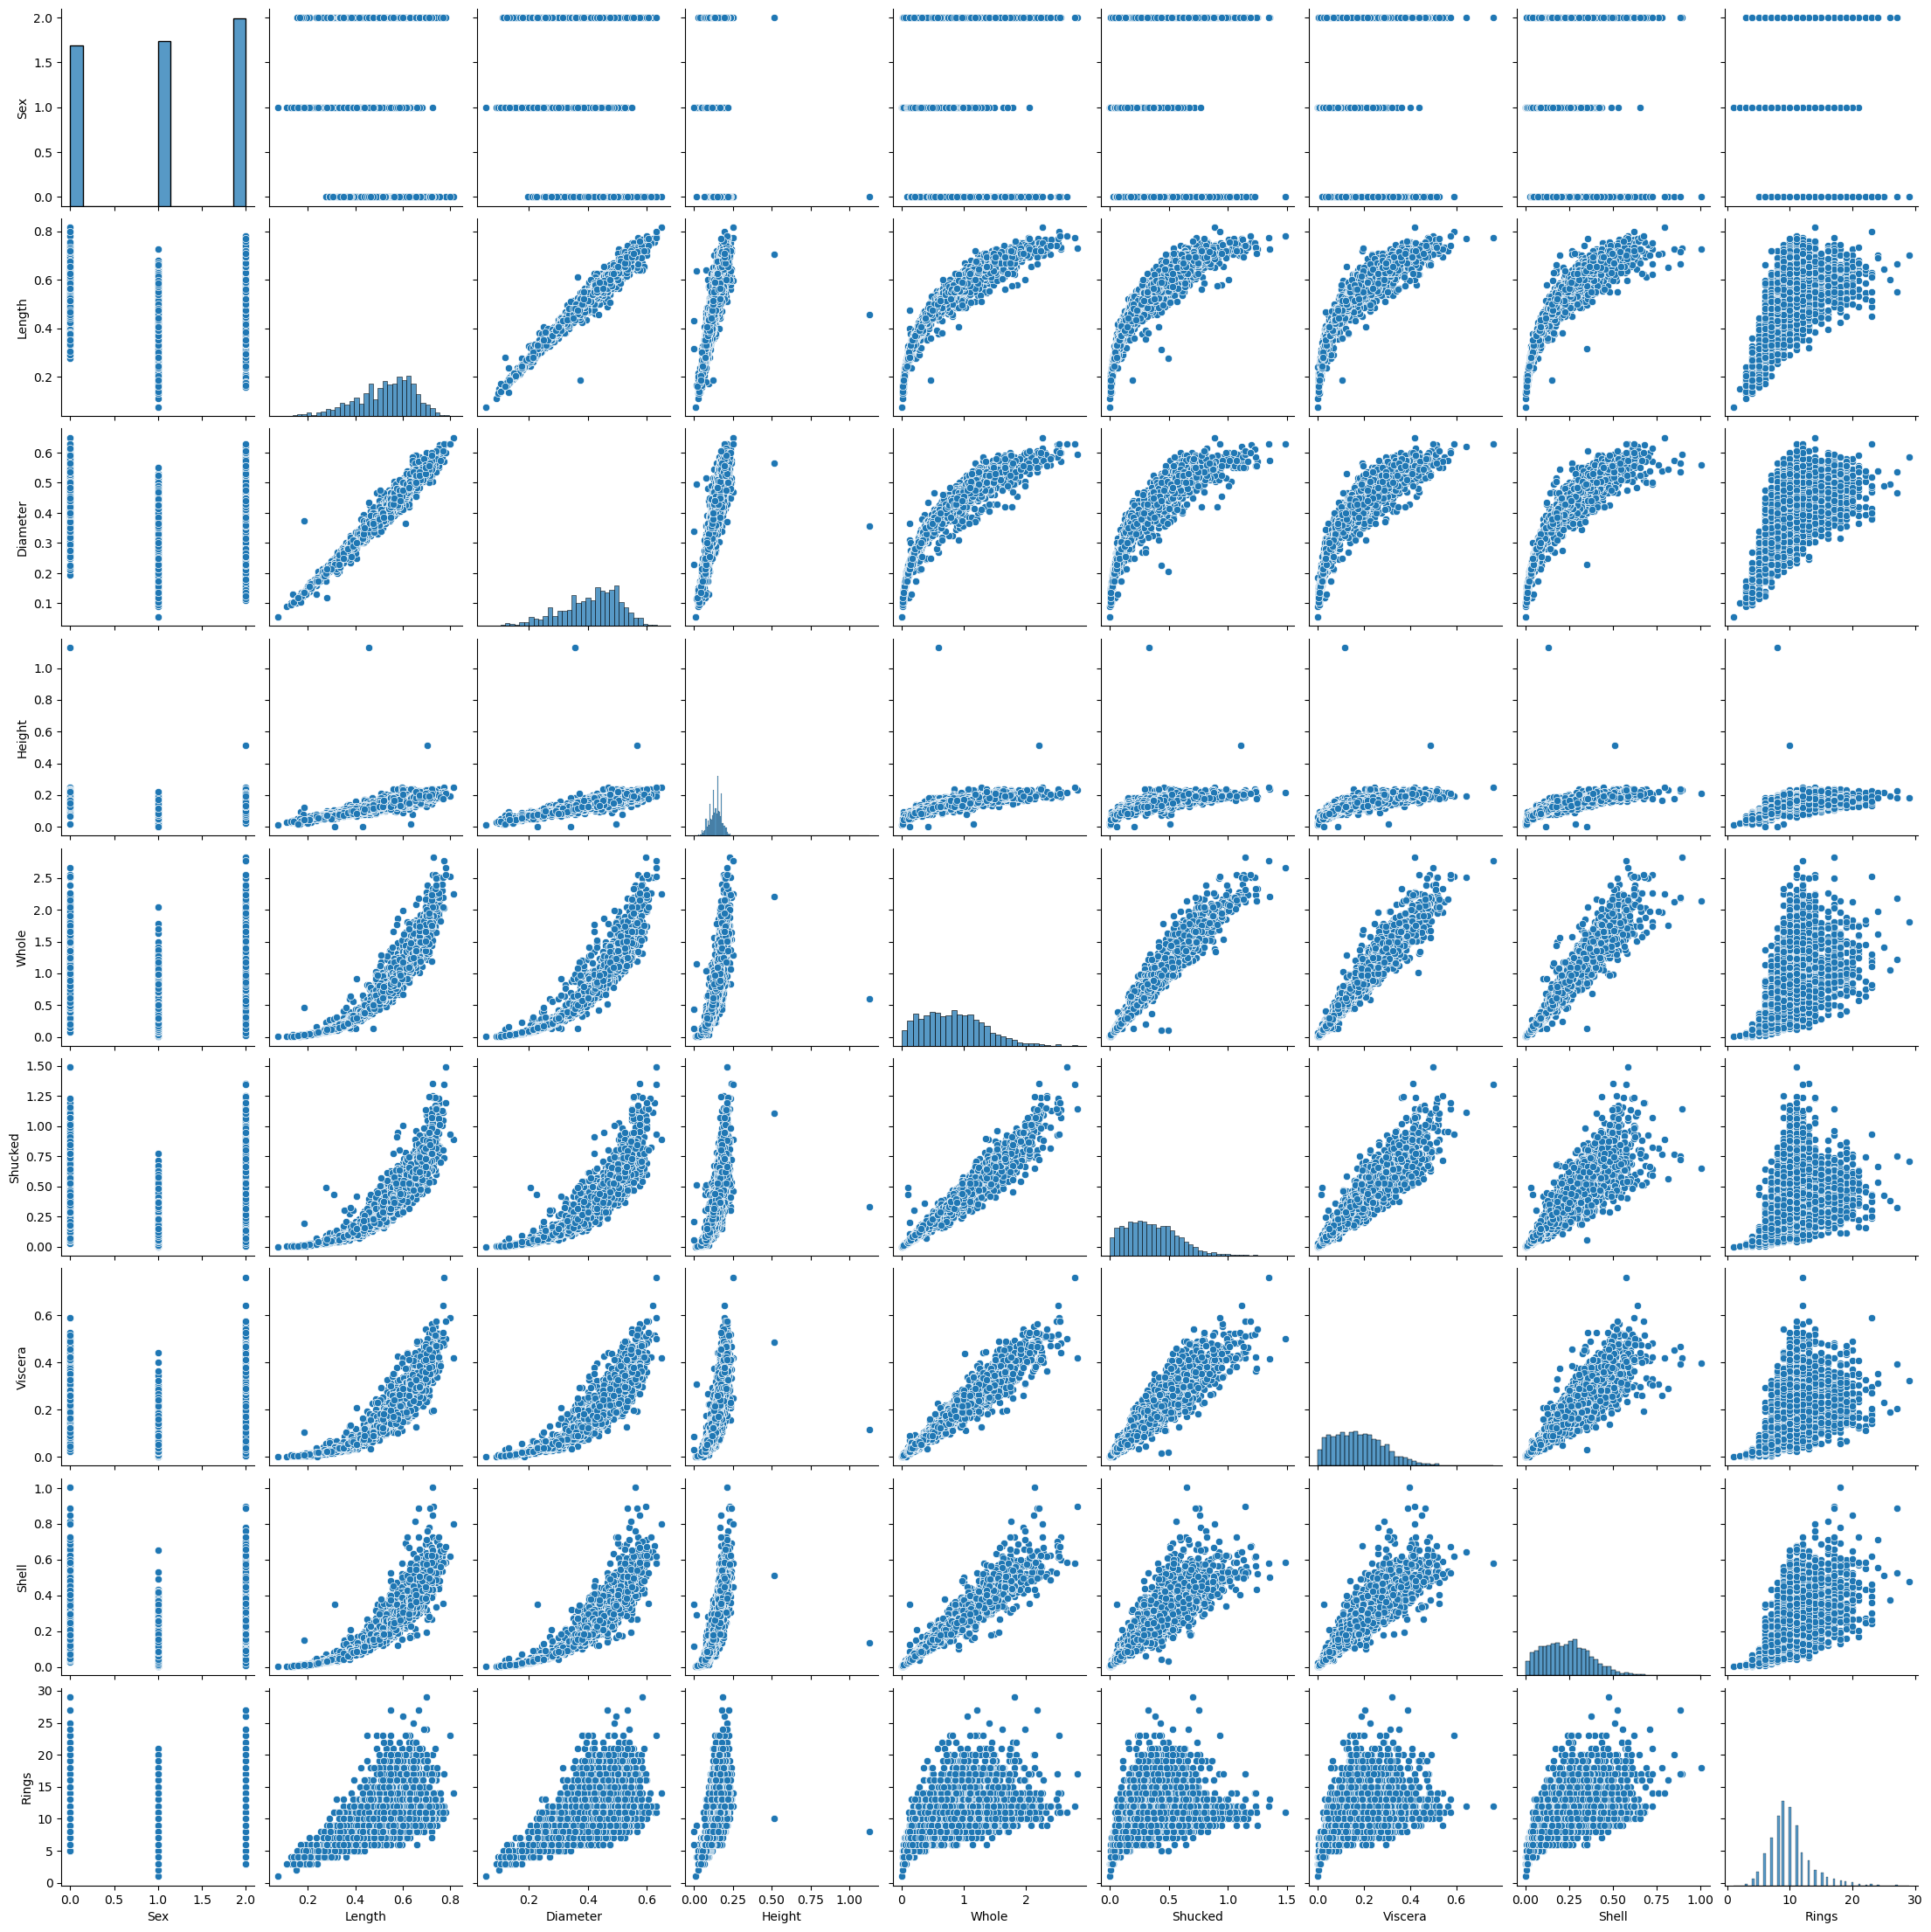

In [57]:
import numpy as np
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])

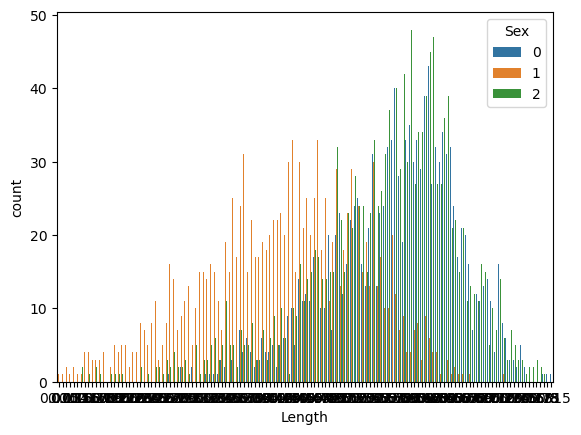

In [58]:
ax=sns.countplot(x="Length", hue="Sex", data=df)

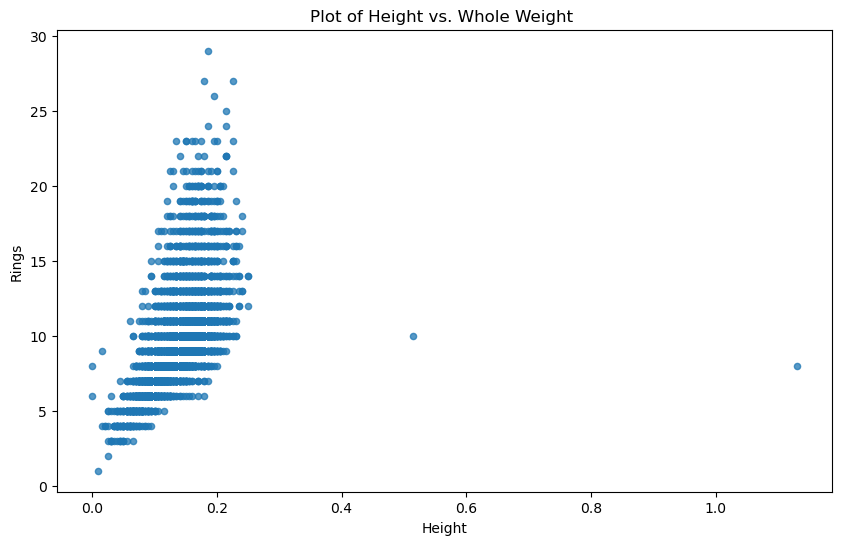

In [59]:
df.plot.scatter("Height", "Rings", figsize=(10, 6),
                title="Plot of Height vs. Whole Weight ", alpha=0.75)
plt.show()
plt.close()

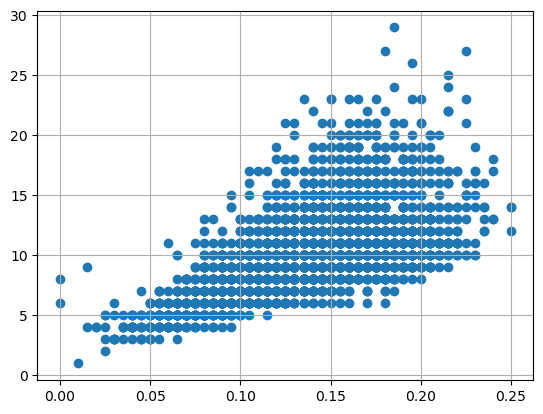

In [60]:
df.drop(df[(df['Height']>0.4)&(df['Rings']<15)].index,inplace=True)
var="Height"
plt.scatter(x=df[var],y=df['Rings'])
plt.grid(True)

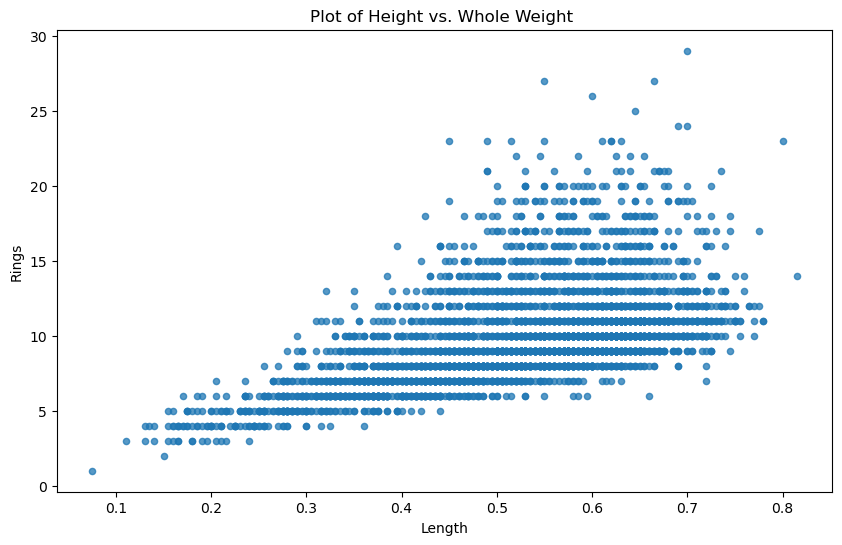

In [61]:
df.plot.scatter("Length", "Rings", figsize=(10, 6),
                title="Plot of Height vs. Whole Weight ", alpha=0.75)
plt.show()
plt.close()

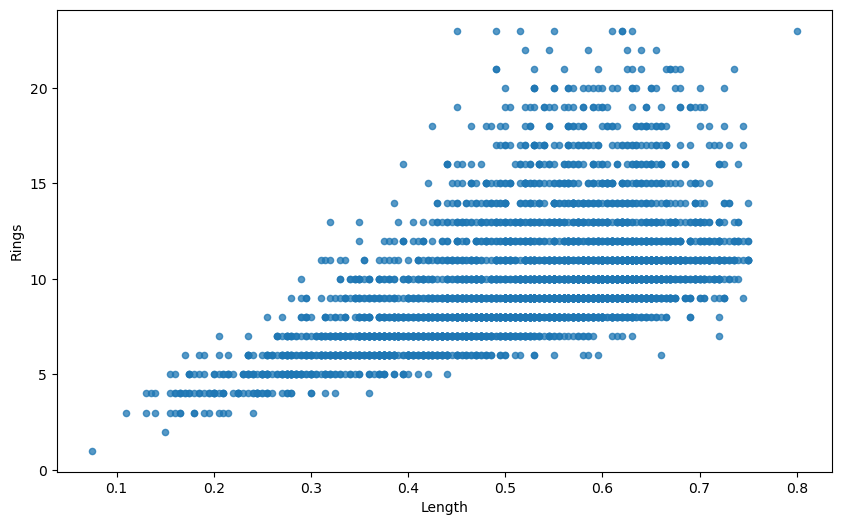

In [66]:
df.drop(df[(df['Length']>0.75)&(df['Rings']<23)].index,inplace=True)
df.drop(df[(df['Rings']>23)].index,inplace=True)
df.plot.scatter("Length", "Rings", figsize=(10, 6), alpha=0.75)
plt.show()
plt.close()

In [67]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()

model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error



ly_preds = model.predict(X_test)

mse = np.sqrt(mean_squared_error(ly_preds, y_test))

print('평균제곱근오차', mse)

평균제곱근오차 2.177169893009526
